In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

class DataGenerator:
    def __init__(self, n_samples=150, n_clusters=3, cluster_std=0.8, random_state=42):
        self.n_samples = n_samples
        self.n_clusters = n_clusterswa
        self.cluster_std = cluster_std
        self.random_state = random_state
        self.points = None
        self.labels = None
    
    def generate_blobs(self):
        """Генерирует кластеризованные данные."""
        self.points, self.labels = make_blobs(
            n_samples=self.n_samples,
            centers=self.n_clusters,
            cluster_std=self.cluster_std,
            random_state=self.random_state
        )
        return self.points, self.labels
    
    def get_centers(self):
        """Возвращает центры кластеров."""
        return np.array([self.points[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

In [6]:
from sklearn.preprocessing import normalize

class SpaceTransformer:
    def __init__(self):
        self.transformed_points = None
    
    def transform(self, points):
        """Преобразует точки так, что L2-расстояние становится равным косинусному."""
        self.transformed_points = normalize(points) / np.sqrt(2)
        return self.transformed_points
    
    def get_transformed_centers(self, original_centers):
        """Преобразует центры кластеров."""
        return normalize(original_centers) / np.sqrt(2)
        

In [7]:
import matplotlib.pyplot as plt

class Plotter:
    def __init__(self, figsize=(16, 8)):
        self.fig, self.axes = plt.subplots(1, 2, figsize=figsize)
        self.ax_original, self.ax_transformed = self.axes
    
    def plot_original_space(self, points, labels, centers):
        """Отрисовывает исходное пространство."""
        self.ax_original.scatter(
            points[:, 0], points[:, 1], 
            c=labels, cmap='viridis', s=50, edgecolors='k'
        )
        self.ax_original.scatter(
            centers[:, 0], centers[:, 1],
            c='red', marker='X', s=200, edgecolors='white', linewidths=2
        )
        self.ax_original.set_title("Исходное пространство (L2 расстояния)")
    
    def plot_transformed_space(self, points, labels, centers):
        """Отрисовывает преобразованное пространство."""
        self.ax_transformed.scatter(
            points[:, 0], points[:, 1], 
            c=labels, cmap='viridis', s=50, edgecolors='k'
        )
        self.ax_transformed.scatter(
            centers[:, 0], centers[:, 1],
            c='red', marker='X', s=200, edgecolors='white', linewidths=2
        )
        self.ax_transformed.set_title("Преобразованное пространство (L2 = CosDist)")
    
    def add_connections(self, original_points, transformed_points, indices):
        """Добавляет линии между точками до и после преобразования."""
        for idx in indices:
            self.ax_original.plot(
                [original_points[idx, 0]], [original_points[idx, 1]], 
                'o--', color='gray', alpha=0.4
            )
            self.ax_transformed.plot(
                [transformed_points[idx, 0]], [transformed_points[idx, 1]], 
                'o--', color='gray', alpha=0.4
            )
    
    def show(self):
        plt.tight_layout()
        plt.show()

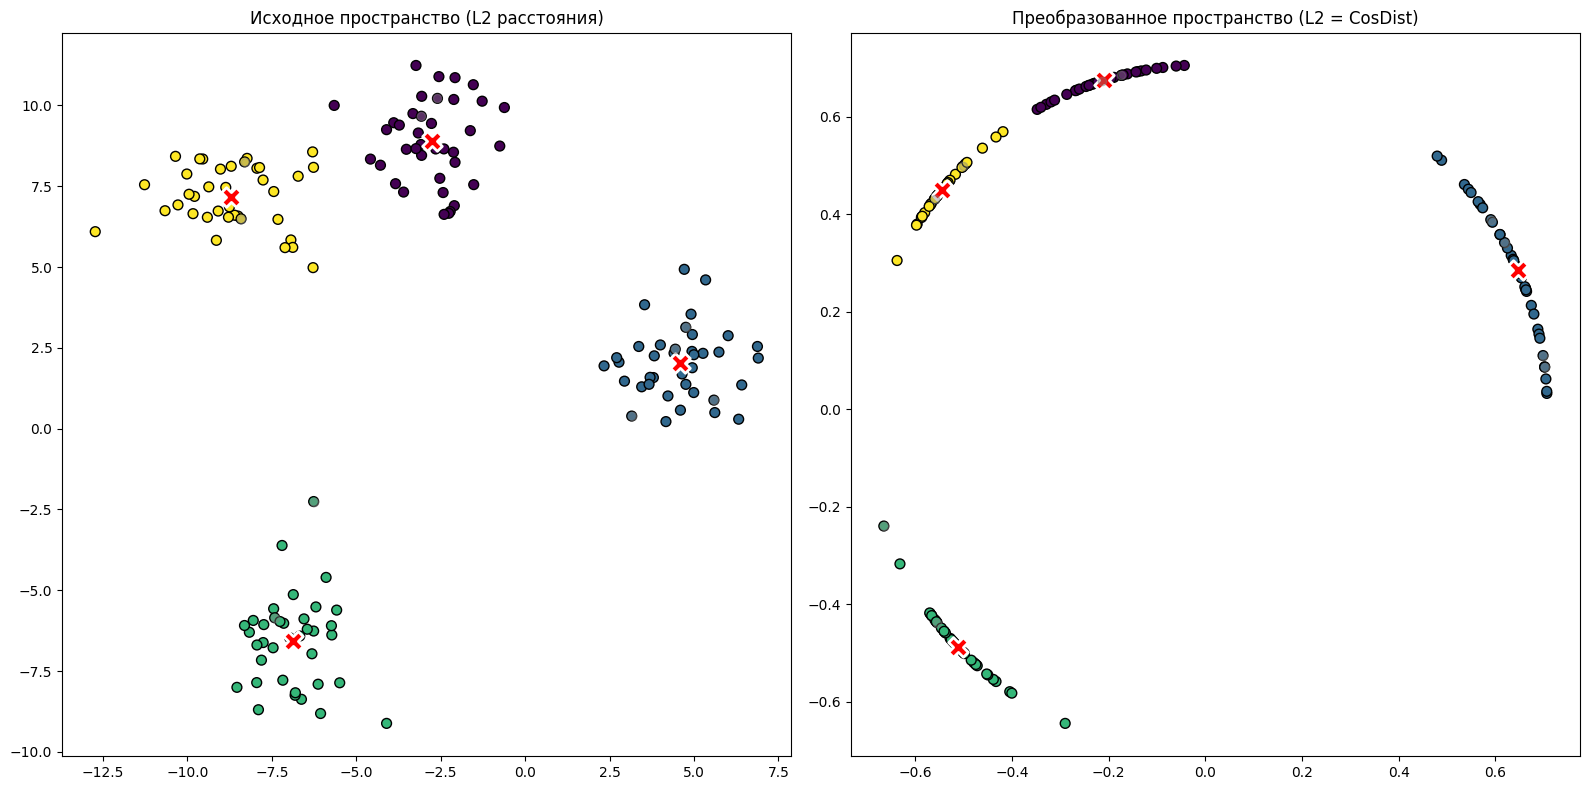

In [8]:
# Инициализация компонентов
generator = DataGenerator(n_clusters=4, cluster_std=1.2)
transformer = SpaceTransformer()
plotter = Plotter()

# Генерация данных
points, labels = generator.generate_blobs()
centers = generator.get_centers()

# Преобразование
transformed_points = transformer.transform(points)
transformed_centers = transformer.get_transformed_centers(centers)

# Визуализация
plotter.plot_original_space(points, labels, centers)
plotter.plot_transformed_space(transformed_points, labels, transformed_centers)

# Добавляем линии для 10 случайных точек
np.random.seed(0)
indices = np.random.choice(len(points), 10, replace=False)
plotter.add_connections(points, transformed_points, indices)

plotter.show()